In [245]:
import pandas as pd
import numpy as np
import os
from glob import glob 
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.signal import find_peaks
from matplotlib import cm
import matplotlib.dates as mdates

import pytz
tz_PDT = pytz.timezone('America/Vancouver')
# tz_JST = pytz.timezone('Asia/Tokyo')

In [6]:
dirs = glob("RGAdata_2019/*M")
len(dirs)

33

In [253]:
N = 10
def avg_df(k):
#     k = 1
    dir_k = dirs[k]
    flist_k = os.listdir(dir_k)
    

    
    p_sum = np.zeros(1990)
    # print flist_k
    N0 = 2
    print dir_k + '/' + flist_k[N0]
    for i in range(N0, N):
        fnamei = dir_k + '/' + flist_k[i]
        dfi = pd.read_csv(fnamei,header=18, names=['m','p','col3'], sep=',')
        p_sum = p_sum + np.array(dfi.p)
    #     print p_sum[0]
    p_av = p_sum/(N-N0)

    df_k = pd.DataFrame([])
    df_k['m'] = dfi['m']
    df_k['p'] = p_av
    
    idx_peaks_k = find_peaks(df_k['p'], height=9e-11, threshold=1e-11, width=2)
    m_peaks_k  = np.array(df_k['m'][idx_peaks_k[0]])
    m_corr_k = np.round(m_peaks_k-0.5) 

    ppar_k =  idx_peaks_k[1]['peak_heights']
    ptot_k = np.sum(df_k['p'])
    time_k = pd.to_datetime(flist_k[N0], format='%b_%d_%Y__%I-%M-%S_%p.txt').tz_localize('America/Vancouver')
    return df_k, m_peaks_k, m_corr_k, ppar_k, ptot_k, time_k

In [254]:
# pd.to_datetime('Nov_16_2019__12-12-33_AM.txt',format='%b_%d_%Y__%I-%M-%S_%p.txt').tz_localize('America/Vancouver')

<IPython.core.display.Javascript object>


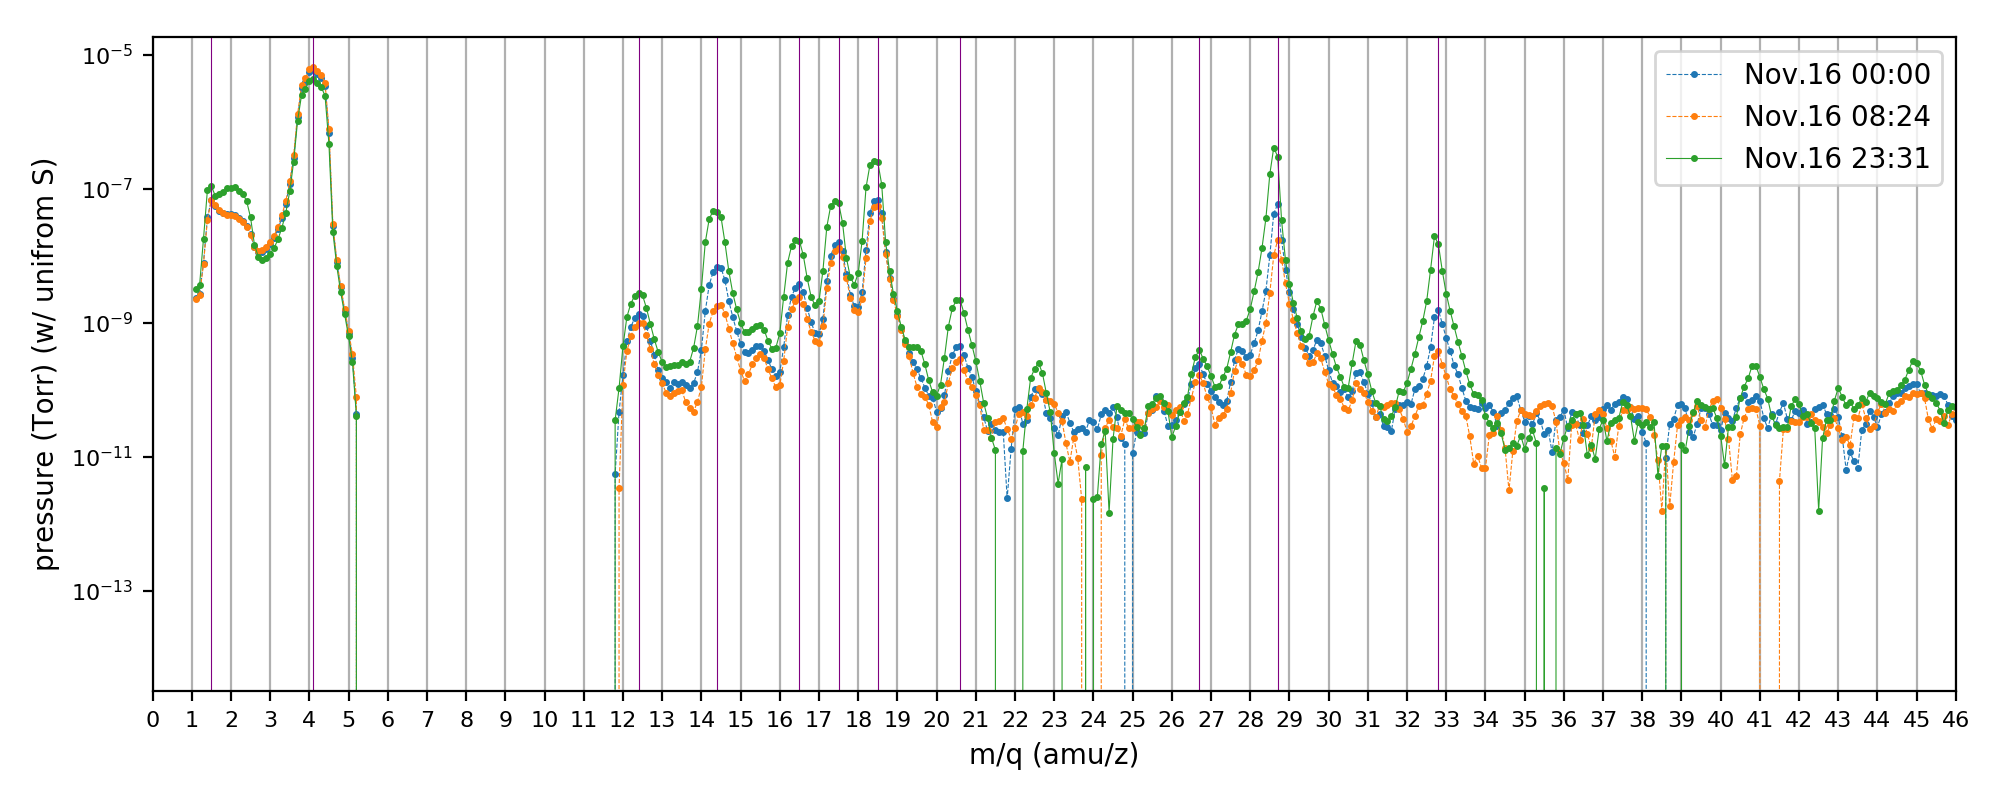

RGAdata_2019/rga1_Nov_16_2019_12-00-18_AM/Nov_16_2019__12-12-33_AM.txt
RGAdata_2019/rga1_Nov_16_2019_08-20-36_AM/Nov_16_2019__08-24-42_AM.txt
RGAdata_2019/rga1_Nov_16_2019_11-20-18_PM/Nov_16_2019__11-31-12_PM.txt
RGAdata_2019/rga1_Nov_16_2019_02-16-17_PM/Nov_16_2019__02-27-11_PM.txt


In [255]:
fig, ax = plt.subplots(1, figsize=(10,4))
# ax.plot(df.m, df.p, '.-')
ax.xaxis.grid(True, which='both')
ax.xaxis.grid(True, which='minor', ls='--')
ax.xaxis.set_major_locator(MultipleLocator(1))

df_2, m_peaks_2, m_corr_2, ppar_2, ptot_2, time_2  = avg_df(2)
df_5, m_peaks_5, m_corr_5, ppar_5, ptot_5, time_5  = avg_df(5)
df_18, m_peaks_18, m_corr_18, ppar_18, ptot_18, time_18  = avg_df(18)
df_25, m_peaks_25, m_corr_25, ppar_25,  ptot_25, time_25  = avg_df(25)

ax.plot(df_2['m'], df_2['p'],'.--', lw=.4, markersize=3, label='Nov.16 00:00')
ax.plot(df_5['m'], df_5['p'],'.--', lw=.4, markersize=3, label='Nov.16 08:24')
ax.plot(df_18['m'], df_18['p'],'.-', lw=.4, markersize=3, label='Nov.16 23:31')
# ax.plot(df_25['m'], df_25['p'],'.--', lw=.4, markersize=3)

for mi in m_peaks_2:
    ax.axvline(mi, lw=.4, c='purple')
# for mi in m_peaks_5:
#     ax.axvline(mi, lw=.4, c='purple')
# for mi in m_peaks_18:
#     ax.axvline(mi, lw=.4, c='r')

# idx_H2O = np.where(m_corr_18==18)
# ax.axhline(ppar_18[idx_H2O],  lw=.4, c='black')
# ax.axhline(ppar_18[idx_H2O]*0.003,  lw=.4, c='blue')
# ax.axhline(ppar_18[idx_H2O]*0.001,  lw=.4, c='green')

# idx_H2O = np.where(m_corr_2==18)
# ax.axhline(ppar_2[idx_H2O],  lw=.4, c='black')
# ax.axhline(ppar_2[idx_H2O]*0.003,  lw=.4, c='blue')
# ax.axhline(ppar_2[idx_H2O]*0.001,  lw=.4, c='green')


ax.set_xlim(0,46)
# ax.set_xlim(90,100)
ax.set_yscale('log')
ax.set_xlabel('m/q (amu/z)', fontsize=10)
ax.set_ylabel('pressure (Torr) (w/ unifrom S)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
fig.tight_layout()
ax.legend()
# fig.savefig('RGA_compared.pdf')




In [260]:
pd.read_csv('export.csv')

,Time,Timestamp,


<IPython.core.display.Javascript object>


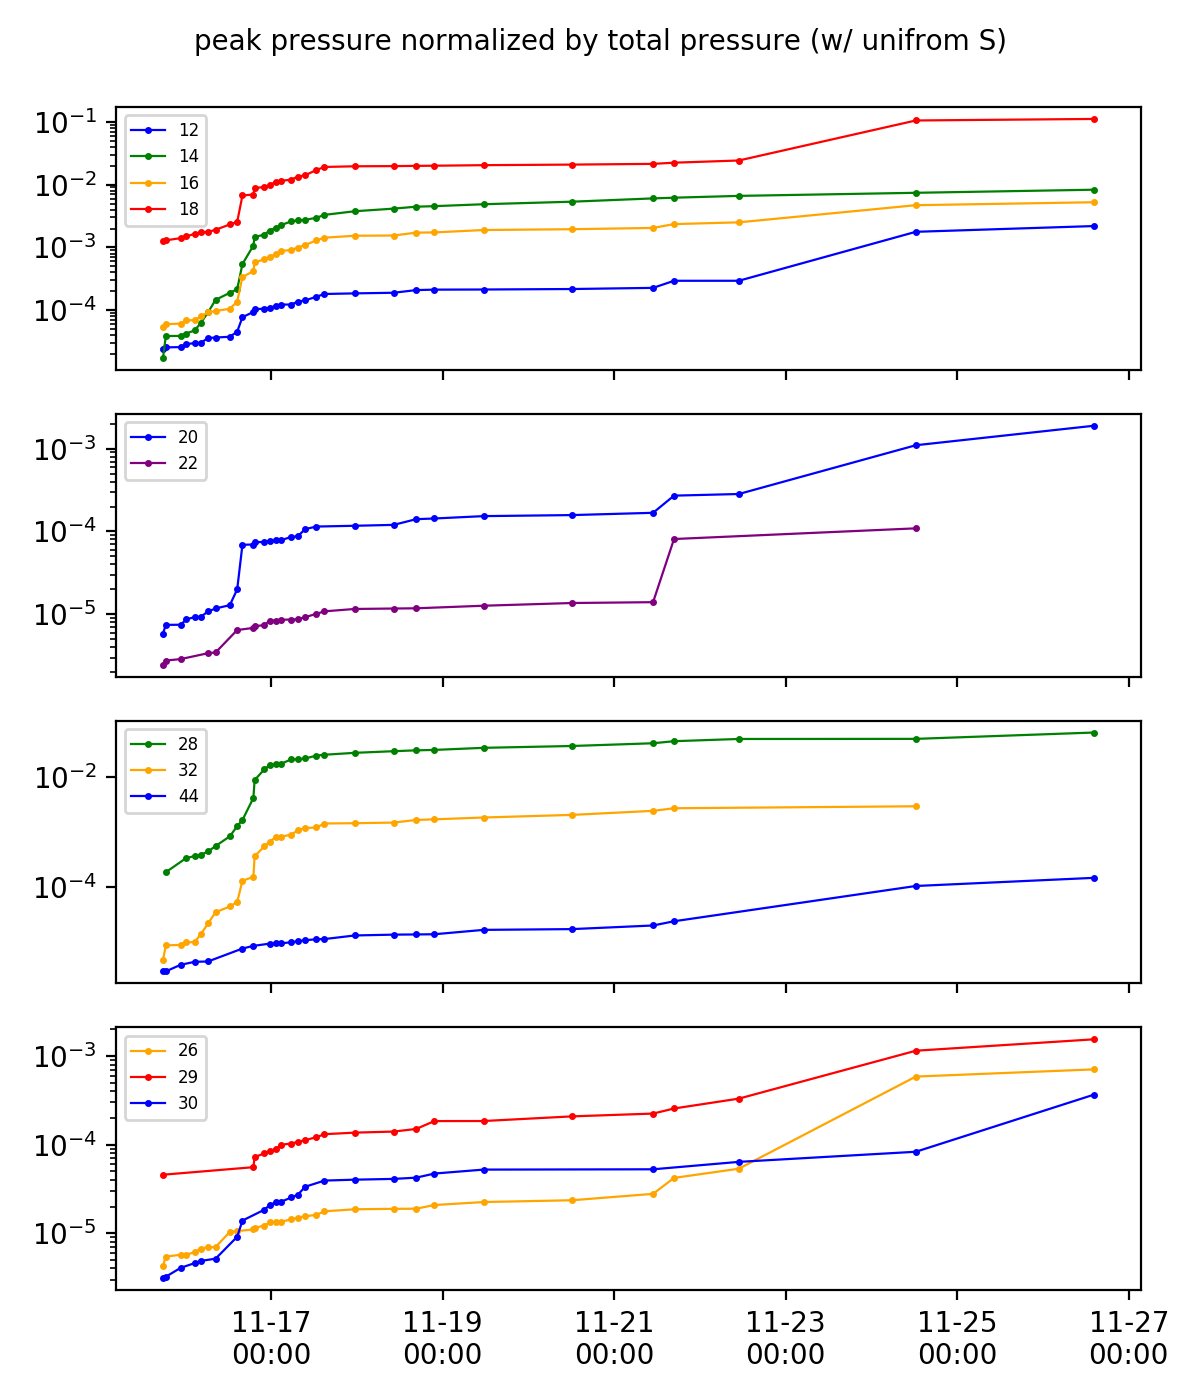

RGAdata_2019/rga1_Nov_15_2019_10-35-20_PM/Nov_15_2019__10-38-04_PM.txt
RGAdata_2019/rga1_Nov_16_2019_03-41-57_PM/Nov_16_2019__03-55-34_PM.txt
RGAdata_2019/rga1_Nov_16_2019_12-00-18_AM/Nov_16_2019__12-12-33_AM.txt
RGAdata_2019/rga1_Nov_26_2019_02-03-57_PM/Nov_26_2019__02-16-12_PM.txt
RGAdata_2019/rga1_Nov_16_2019_09-56-31_PM/Nov_16_2019__10-01-58_PM.txt
RGAdata_2019/rga1_Nov_16_2019_08-20-36_AM/Nov_16_2019__08-24-42_AM.txt
RGAdata_2019/rga1_Nov_16_2019_06-08-33_AM/Nov_16_2019__06-18-05_AM.txt
RGAdata_2019/rga1_Nov_16_2019_07-11-26_PM/Nov_16_2019__07-19-36_PM.txt
RGAdata_2019/rga1_Nov_17_2019_02-42-08_PM/Nov_17_2019__02-53-13_PM.txt
RGAdata_2019/rga1_Nov_17_2019_02-47-12_AM/Nov_17_2019__02-49-56_AM.txt
RGAdata_2019/rga1_Nov_21_2019_04-40-20_PM/Nov_21_2019__04-43-04_PM.txt
RGAdata_2019/rga1_Nov_15_2019_06-27-40_PM/Nov_15_2019__06-29-02_PM.txt
RGAdata_2019/rga1_Nov_16_2019_06-45-48_PM/Nov_16_2019__06-59-25_PM.txt
RGAdata_2019/rga1_Nov_17_2019_11-11-34_PM/Nov_17_2019__11-23-50_PM.txt
RGAdat

In [259]:
fig2, ax2 = plt.subplots(5, sharex=True, figsize=(6,7))
xfmt = mdates.DateFormatter('%m-%d\n%H:%M', tz=tz_PDT)

# 
# ax.axhline(ppar_18[idx_H2O],  lw=.4, c='black')
# ax.axhline(ppar_18[idx_H2O]*0.003,  lw=.4, c='blue')
# ax.axhline(ppar_18[idx_H2O]*0.001,  lw=.4, c='green')

r_4 = [] 
r_12 = []
r_14 = []
r_16 = []
r_18 = []
r_20 = []
r_22 = []
r_26 = []

r_28 = []
r_29 = []
r_30 = []
r_32 = []
r_44 = []

for k in range(len(dirs)):
    f_k, m_peaks_k, m_corr_k, ppar_k, ptot_k, time_k  = avg_df(k)
    idx_4 = np.where(m_corr_k==4)
    idx_12 = np.where(m_corr_k==12)
    idx_14 = np.where(m_corr_k==14)
    idx_16 = np.where(m_corr_k==16)
    idx_18 = np.where(m_corr_k==18)
    idx_20 = np.where(m_corr_k==20)
    idx_22 = np.where(m_corr_k==22)
    idx_26 = np.where(m_corr_k==26)
    idx_28 = np.where(m_corr_k==28)
    idx_29 = np.where(m_corr_k==29)
    idx_30 = np.where(m_corr_k==30)
    idx_32 = np.where(m_corr_k==32)
    idx_44 = np.where(m_corr_k==44)
    if len(idx_4[0])!=0:
        r_4.append([time_k, ppar_k[idx_4][0]/ptot_k])
    if len(idx_12[0])!=0:
        r_12.append([time_k, ppar_k[idx_12][0]/ptot_k])
    if len(idx_14[0])!=0:
        r_14.append([time_k, ppar_k[idx_14][0]/ptot_k])
    if len(idx_16[0])!=0:
        r_16.append([time_k, ppar_k[idx_16][0]/ptot_k])
    if len(idx_18[0])!=0:
        r_18.append([time_k, ppar_k[idx_18][0]/ptot_k])
    if len(idx_20[0])!=0:
        r_20.append([time_k, ppar_k[idx_20][0]/ptot_k])
    if len(idx_22[0])!=0:
        r_22.append([time_k, ppar_k[idx_22][0]/ptot_k])
    if len(idx_26[0])!=0:
        r_26.append([time_k, ppar_k[idx_26][0]/ptot_k])
    if len(idx_28[0])!=0:
        r_28.append([time_k, ppar_k[idx_28][0]/ptot_k])
    if len(idx_29[0])!=0:
        r_29.append([time_k, ppar_k[idx_29][0]/ptot_k])
    if len(idx_30[0])!=0:
        r_30.append([time_k, ppar_k[idx_30][0]/ptot_k])
    if len(idx_32[0])!=0:
        r_32.append([time_k, ppar_k[idx_32][0]/ptot_k])
    if len(idx_44[0])!=0:
        r_44.append([time_k, ppar_k[idx_44][0]/ptot_k])

r_4 = np.sort(np.array(r_4,dtype=object), axis=0)
r_12 = np.sort(np.array(r_12,dtype=object),axis=0)
r_14 = np.sort(np.array(r_14,dtype=object),axis=0)
r_16 = np.sort(np.array(r_16,dtype=object),axis=0)
r_18 = np.sort(np.array(r_18,dtype=object),axis=0)
r_20 = np.sort(np.array(r_20,dtype=object),axis=0)
r_22 = np.sort(np.array(r_22),axis=0)
r_26 = np.sort(np.array(r_26),axis=0)
r_28 = np.sort(np.array(r_28),axis=0)
r_29 = np.sort(np.array(r_29),axis=0)
r_30 = np.sort(np.array(r_30),axis=0)
r_32 = np.sort(np.array(r_32),axis=0)
r_44 = np.sort(np.array(r_44),axis=0)


# ax2[0].plot(r_4[:,0], r_4[:,1],'.-', markersize=3, lw=.8)
ax2[0].plot(r_12[:,0], r_12[:,1],'.-',c='b',markersize=3, lw=.8, label='12')
ax2[0].plot(r_14[:,0], r_14[:,1],'.-',c='g',markersize=3, lw=.8, label='14')
ax2[0].plot(r_16[:,0], r_16[:,1],'.-',c='orange',markersize=3, lw=.8, label='16')
ax2[0].plot(r_18[:,0], r_18[:,1],'.-',c='r',markersize=3, lw=.8, label='18')
ax2[1].plot(r_20[:,0], r_20[:,1],'.-',c='blue',markersize=3, lw=.8, label='20')
ax2[1].plot(r_22[:,0], r_22[:,1],'.-',c='purple',markersize=3, lw=.8, label='22')
ax2[3].plot(r_26[:,0], r_26[:,1],'.-',c='orange',markersize=3, lw=.8, label='26')
ax2[2].plot(r_28[:,0], r_28[:,1],'.-',c='g',markersize=3, lw=.8, label='28')
ax2[3].plot(r_29[:,0], r_29[:,1],'.-',c='r',markersize=3, lw=.8, label='29')
ax2[3].plot(r_30[:,0], r_30[:,1],'.-',c='b',markersize=3, lw=.8, label='30')
ax2[2].plot(r_32[:,0], r_32[:,1],'.-',c='orange',markersize=3, lw=.8, label='32')
ax2[2].plot(r_44[:,0], r_44[:,1],'.-',c='b',markersize=3, lw=.8, label='44')

ax2[0].legend(fontsize=6,loc='upper left')
ax2[1].legend(fontsize=6,loc='upper left')
ax2[2].legend(fontsize=6,loc='upper left')
ax2[3].legend(fontsize=6,loc='upper left')

ax2[0].set_yscale('log')
ax2[1].set_yscale('log')
ax2[2].set_yscale('log')
ax2[3].set_yscale('log')
fig2.suptitle('peak pressure normalized by total pressure (w/ unifrom S)', fontsize=10)

# ax2[0].set_xlim(pd.Timestamp('2019-11-15 17:00'),pd.Timestamp('2019-11-20 01:55'))
# ax2[0].set_ylim(0,0.02)
# ax2[1].set_ylim(0,0.0001)

ax2[0].xaxis.set_major_formatter(xfmt)
fig2.tight_layout(rect=[0,0,1,0.95])

# fig2.savefig('evolution_zoomin.pdf')
fig2.savefig('evolution_zoomout.pdf')

In [271]:
print r_4[0]
print  r_4[-1]

[Timestamp('2019-11-15 17:41:11-0800', tz='America/Vancouver')
 0.0008417567128146344]
[Timestamp('2019-11-26 14:16:12-0800', tz='America/Vancouver')
 0.17139766224236994]


In [7]:
idx_peaks = find_peaks(df['p'], height=1e-10, threshold=1e-11)
m_peaks  = np.array(df['m'][idx_peaks[0]])
print m_peaks
print idx_peaks[1]['peak_heights']
print idx_peaks[1]['peak_heights']/(idx_peaks[1]['peak_heights'][1])
ppar =  idx_peaks[1]['peak_heights']

ptot = np.sum(df.p)
print ptot



[ 1.5  4.1 12.4 13.4 14.4 15.5 16.5 17.4 18.4 20.5 22.5 26.6 27.6 28.6
 29.6 30.7 32.7 94. ]
[7.1590e-08 6.2980e-06 1.1330e-09 1.2728e-10 1.5930e-09 3.4600e-10
 2.5970e-09 1.5310e-08 6.4500e-08 3.5170e-10 1.2616e-10 2.1480e-10
 3.3830e-10 1.4350e-08 3.3820e-10 1.4648e-10 3.2350e-10 1.0023e-10]
[1.13671007e-02 1.00000000e+00 1.79898380e-04 2.02095903e-05
 2.52937440e-04 5.49380756e-05 4.12353128e-04 2.43093045e-03
 1.02413465e-02 5.58431248e-05 2.00317561e-05 3.41060654e-05
 5.37154652e-05 2.27850111e-03 5.36995872e-05 2.32581772e-05
 5.13655129e-05 1.59145761e-05]
3.72336194396e-05


#### Calibration

[-0.5  0.1  0.4  0.4  0.4  0.5  0.5  0.4  0.4  0.5  0.5  0.6  0.6  0.6
  0.6  0.7  0.7]
[ 1.5  4.1 12.4 13.4 14.4 15.5 16.5 17.4 18.4 20.5 22.5 26.6 27.6 28.6
 29.6 30.7 32.7]


<IPython.core.display.Javascript object>


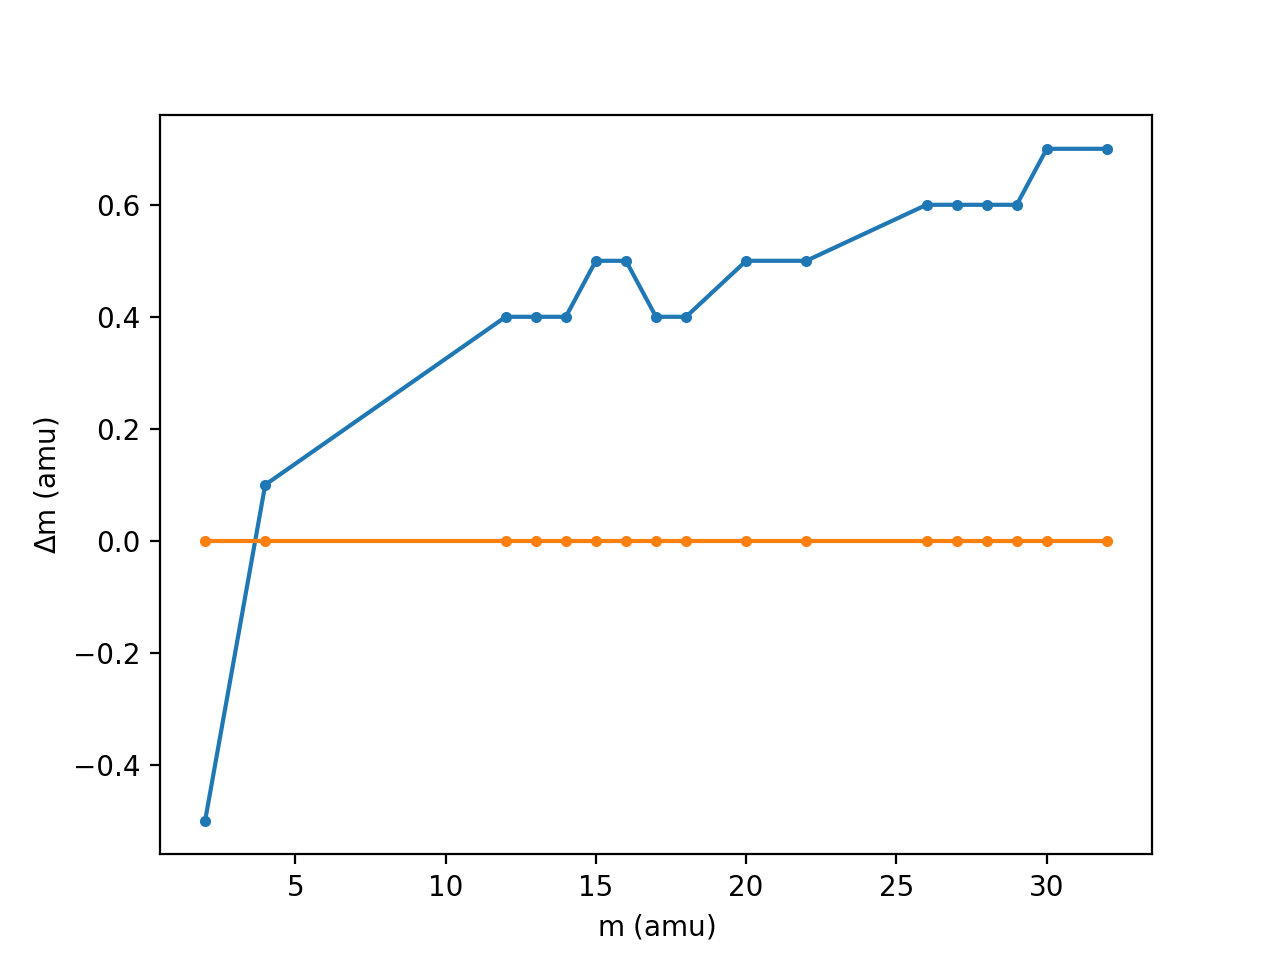

Text(0.5,0,'$\\mathsf{m}$ (amu)')

In [10]:
m_real = np.array([2, 4, 12,13,14,15,16,17,18,20,22,26,27,28,29,30,32])
m_diff = m_peaks[:-1] - m_real
m_corr = np.round(m_peaks-0.5) 
m_corr[0] = 2
print m_diff
print m_peaks[:-1]

# m_peaks_corr = 
fig0, ax0 = plt.subplots(1)
ax0.plot(m_real, m_diff,'.-')
ax0.plot(m_real, m_corr[:-1]-m_real,'.-')
ax0.set_ylabel('$\mathsf{\Delta m}$ (amu)')
ax0.set_xlabel('$\mathsf{m}$ (amu)')


<IPython.core.display.Javascript object>


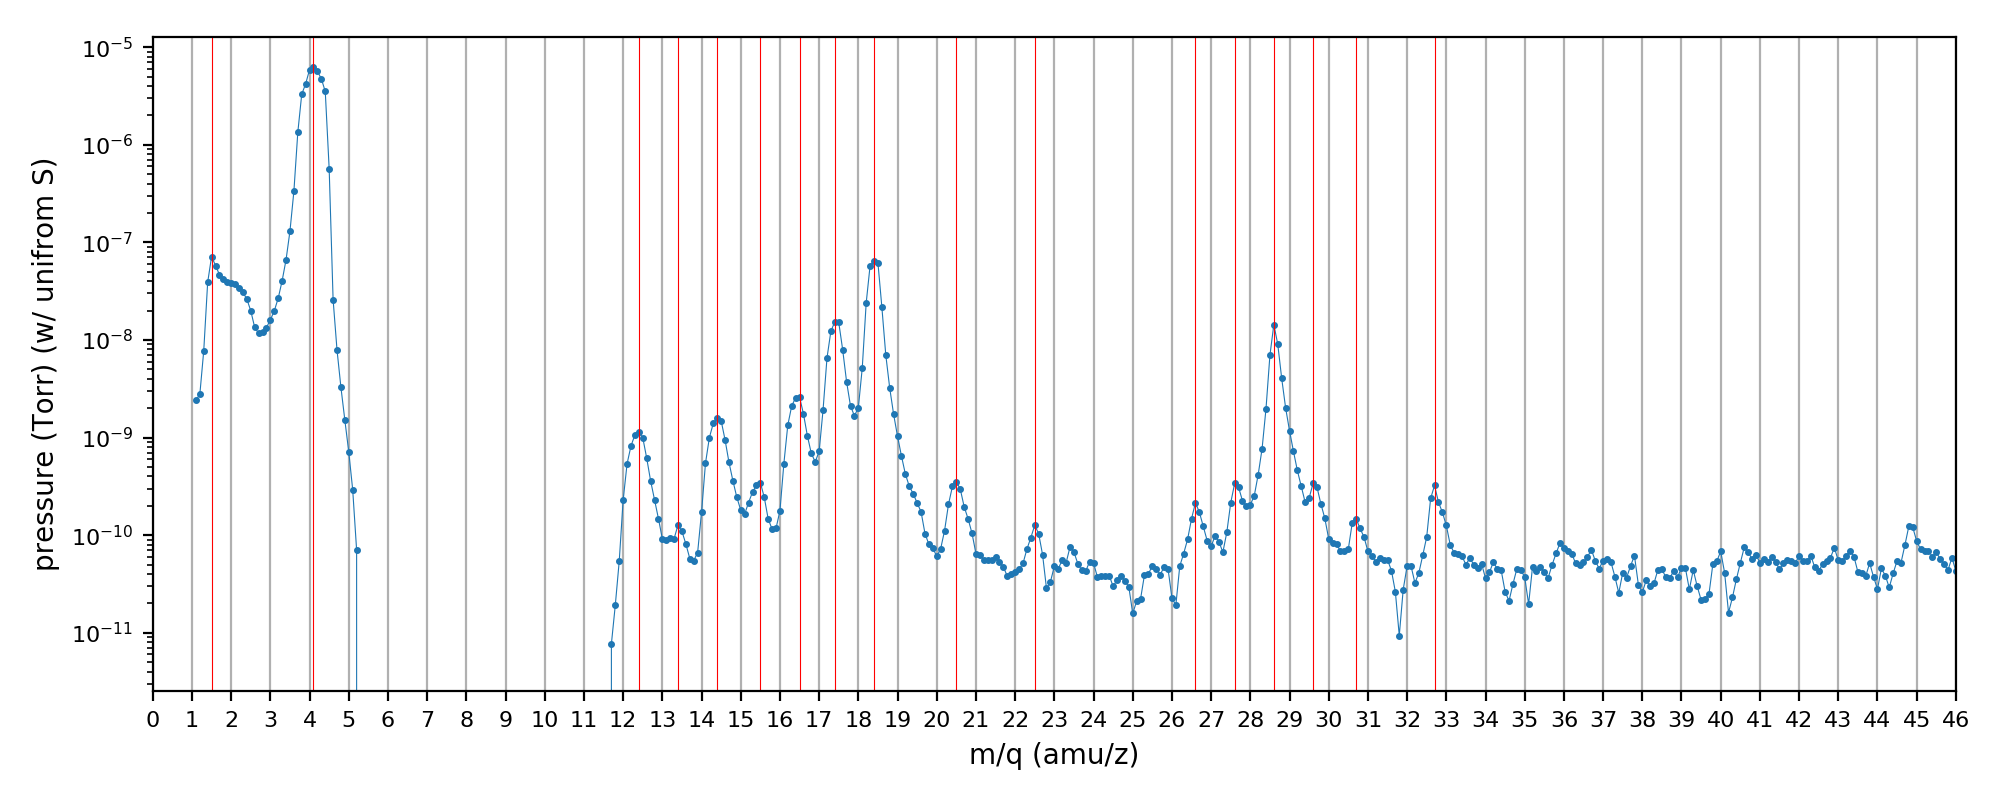

In [9]:
fig, ax = plt.subplots(1, figsize=(10,4))
# ax.plot(df.m, df.p, '.-')
ax.xaxis.grid(True, which='both')
ax.xaxis.grid(True, which='minor', ls='--')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(df['m'], df['p'],'.-', lw=.4, markersize=3)

for mi in m_peaks:
    ax.axvline(mi, lw=.4, c='r')
ax.set_xlim(0,46)
# ax.set_xlim(90,100)
ax.set_yscale('log')
ax.set_xlabel('m/q (amu/z)', fontsize=10)
ax.set_ylabel('pressure (Torr) (w/ unifrom S)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
fig.tight_layout()


4.118301803400001e-05


<IPython.core.display.Javascript object>


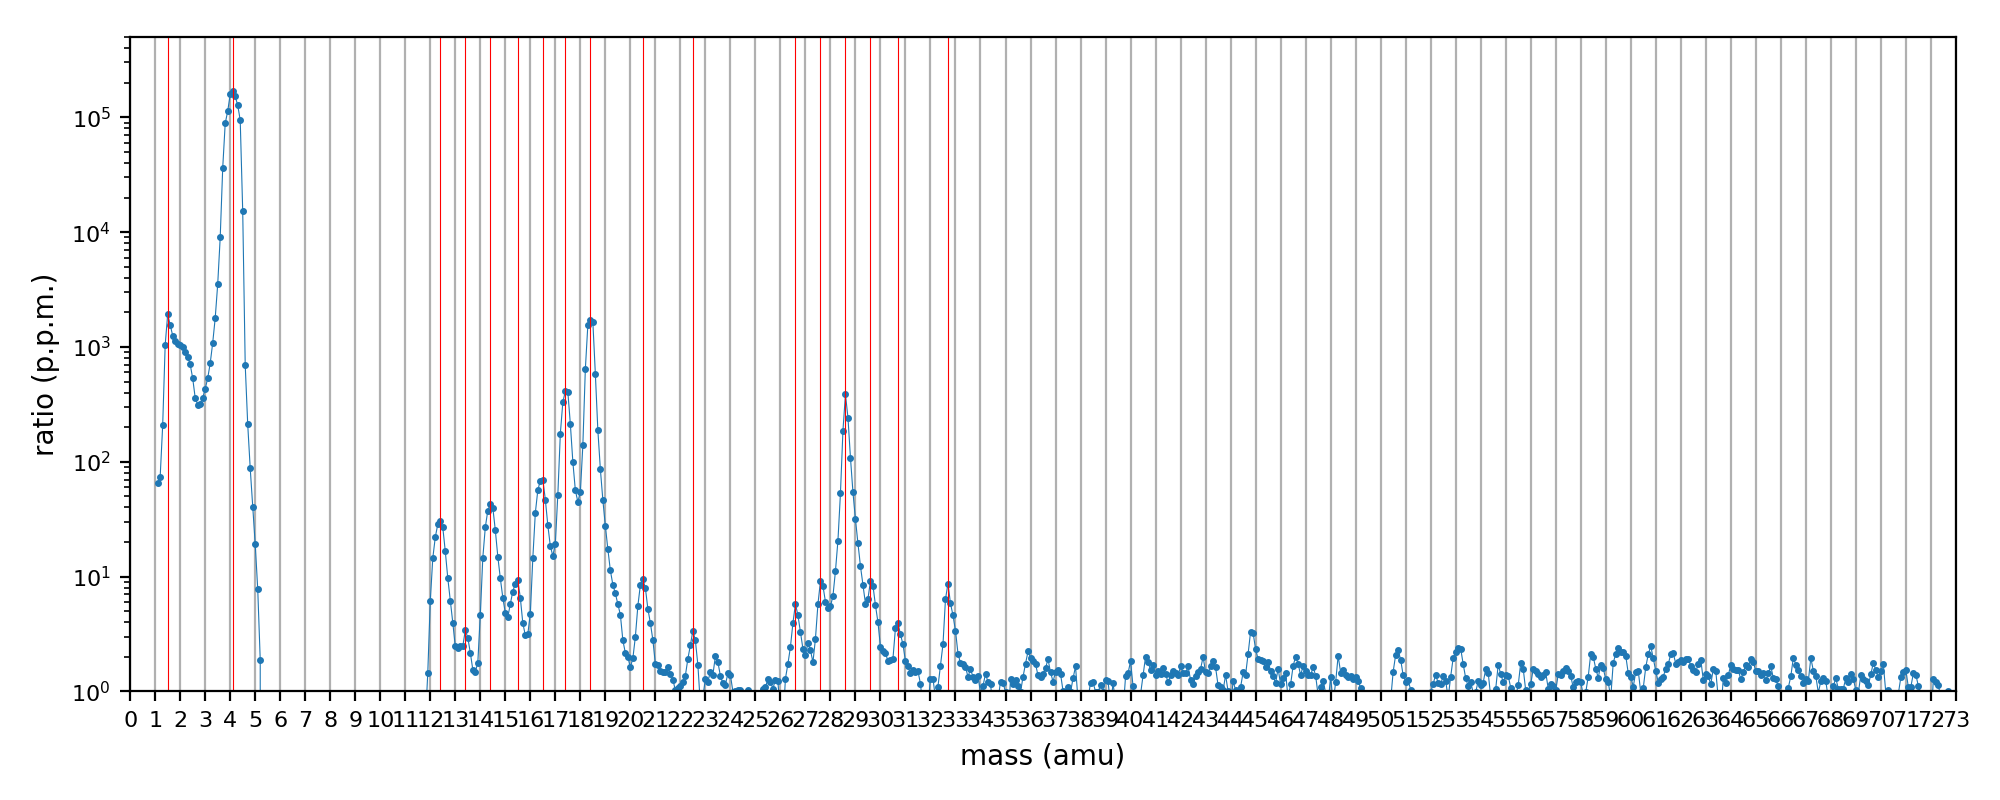

In [234]:
fig1, ax1 = plt.subplots(1, figsize=(10,4))
# ax.plot(df.m, df.p, '.-')
ax1.xaxis.grid(True, which='both')
ax1.xaxis.grid(True, which='minor', ls='--')
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.plot(df['m'], df['p']/ptot*1e6,'.-', lw=.4, markersize=3)
# ax1.plot(df1['m'], df1['p']/ptot*1e6,'.-', lw=.4, markersize=3)


for mi in m_peaks:
    ax1.axvline(mi, lw=.4, c='r')
ax1.set_xlim(0,73)
ax1.set_ylim(1, 5e5)
# ax.set_xlim(0,150)
ax1.set_yscale('log')
ax1.set_xlabel('mass (amu)', fontsize=10)
ax1.set_ylabel('ratio (p.p.m.)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
fig1.tight_layout()


In [170]:
print m_peaks-.4
print ppar/ptot*1e2

[  1.1   3.6  12.   14.   15.1  16.   17.   18.   20.1  26.2  27.2  28.2
  29.2  32.3  84.9  93.6  97.7  98.1 117.4 135.3]
[1.71672702e-01 1.65116602e+01 2.74384942e-03 4.10363320e-03
 8.47436678e-04 7.04173744e-03 4.20076061e-02 1.72643977e-01
 7.96444786e-04 3.35089575e-04 8.91144014e-04 4.32216988e-02
 7.86732045e-04 1.07082973e-03 2.84097683e-04 3.22948648e-04
 4.34645173e-04 3.35089575e-04 2.64672200e-04 3.13235907e-04]


<IPython.core.display.Javascript object>


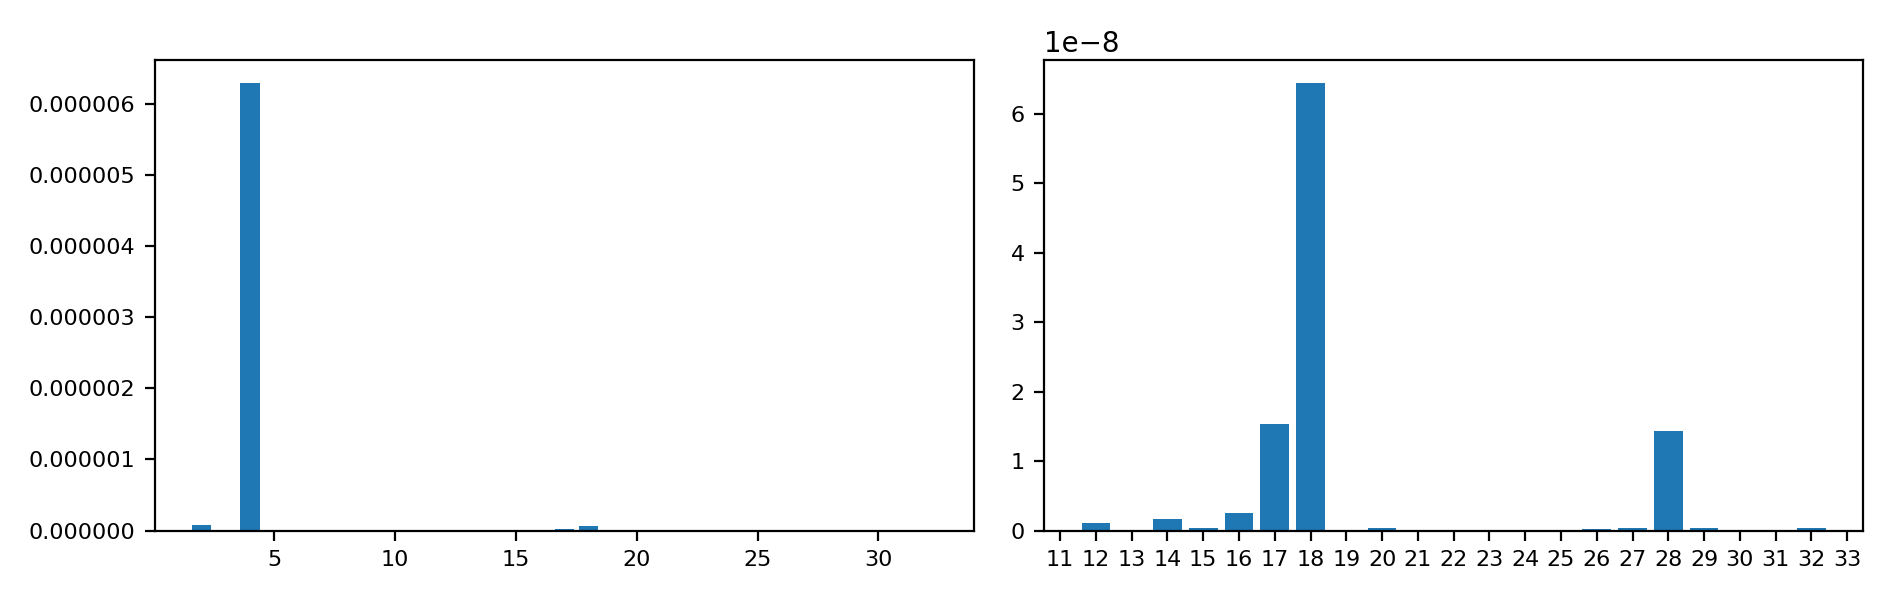

In [232]:
fig2, ax2 = plt.subplots(1,2, figsize=(9.5,3))
# ax2.bar(m_real, ppar[:-1])
ax2[0].bar(m_real[:], ppar[:-1])
ax2[1].bar(m_real[2:], ppar[2:-1])
ax2[1].xaxis.grid(True, which='minor', ls='--')
ax2[1].xaxis.set_major_locator(MultipleLocator(1))
ax2[0].tick_params(axis='both', which='major', labelsize=8)
ax2[1].tick_params(axis='both', which='major', labelsize=8)
fig2.tight_layout()

# ax2.set_y_scale('log')

In [251]:
1/0.18

5.555555555555555